In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import nltk
from nltk.stem import WordNetLemmatizer
import tensorflow as tf
# Загрузка датасетов
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

newsgroups_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
remove=('headers', 'footers', 'quotes')
categories = ['rec.sport.baseball', 'talk.politics.guns', 'comp.sys.mac.hardware', 'sci.med']
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories,remove=remove)
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories,remove=remove)

In [ ]:
print(newsgroups_test.data[0])

[synopsis] Young man with inguianl hernia on one side, repaired, now has
new hernia on other side.  What gives, he asks?  [and he continues...] 

There is the possibility that there is some degree of constipation causing
chronic straining which has caused the bowel movements.  The classic 
problems that are supposed to be looked for in someone with a hernia are
constipation, chronic cough, colon cancer (and you're not too young for
that) and sitting for long periods of time at the computer, reading news.

Good Luck with your surgery!


In [ ]:
nltk.download('wordnet')
# Инициализация лемматизатора
lemmatizer = WordNetLemmatizer()

# Функция для лемматизации текста
def lemmatize_text(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

# Применение лемматизации к тексту
newsgroups_train.data = [lemmatize_text(text) for text in newsgroups_train.data]
newsgroups_test.data = [lemmatize_text(text) for text in newsgroups_test.data]

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Создание TF-IDF векторизатора с использованием встроенного списка стоп-слов для английского языка
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=2)

# Преобразование текста в TF-IDF матрицу
X_train_tfidf = tfidf_vectorizer.fit_transform(newsgroups_train.data)
X_test_tfidf = tfidf_vectorizer.transform(newsgroups_test.data)
# Метки классов
y_train = newsgroups_train.target
y_test = newsgroups_test.target
# Вручную пересортировываем индексы в разреженной матрице
X_train_tfidf.sort_indices()
X_test_tfidf.sort_indices()

In [ ]:
# Создание модели RNN
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=X_train_tfidf.shape[1], output_dim=32, input_length=X_train_tfidf.shape[1]),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(4, activation='softmax')
])


# Компиляция модели
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Обучение модели
history = model.fit(X_train_tfidf, y_train, epochs=10, batch_size=64, validation_data=(X_test_tfidf, y_test))

# Оценка результатов
test_loss, test_accuracy = model.evaluate(X_test_tfidf, y_test)
print(f'Test accuracy: {test_accuracy}')

Epoch 1/10
37/37 [==============================] - 827s 22s/step - loss: 1.3875 - accuracy: 0.2454 - val_loss: 1.3857 - val_accuracy: 0.2575
Epoch 2/10
37/37 [==============================] - 864s 23s/step - loss: 1.3862 - accuracy: 0.2393 - val_loss: 1.3857 - val_accuracy: 0.2568
Epoch 3/10
37/37 [==============================] - 818s 22s/step - loss: 1.3862 - accuracy: 0.2445 - val_loss: 1.3857 - val_accuracy: 0.2575
Epoch 4/10
37/37 [==============================] - 807s 22s/step - loss: 1.3861 - accuracy: 0.2579 - val_loss: 1.3857 - val_accuracy: 0.2575
Epoch 5/10
37/37 [==============================] - 797s 22s/step - loss: 1.3862 - accuracy: 0.2423 - val_loss: 1.3857 - val_accuracy: 0.2575
Epoch 6/10
37/37 [==============================] - 805s 22s/step - loss: 1.3861 - accuracy: 0.2570 - val_loss: 1.3858 - val_accuracy: 0.2568
Epoch 7/10
37/37 [==============================] - 803s 22s/step - loss: 1.3863 - accuracy: 0.2540 - val_loss: 1.3857 - val_accuracy: 0.2575
Epoch 

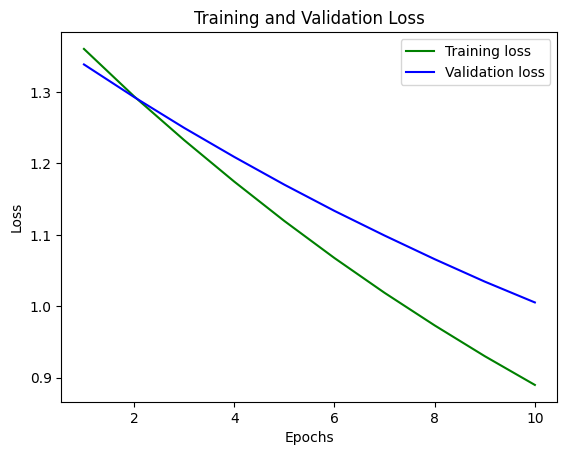

In [ ]:
import matplotlib.pyplot as plt

# Извлекаем значения лосса из истории обучения
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Создаем график
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'g-', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Отображаем график
plt.show()

In [ ]:
%pip install gensim


In [ ]:
# Пример модели
import torch.nn as nn
import torch.optim as optim

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, input):
        output, hidden = self.rnn(input)
        output = self.fc(output[-1])
        return output

In [ ]:
input_size = 32097
hidden_size = 256
output_size = 4

model = RNN(input_size, hidden_size, output_size)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

losses = []
test_losses = []
num_epochs = 10
for epoch in range(num_epochs):
  predictions = []
  targets = []
  for input, target in train_dataloader:
    optimizer.zero_grad()

    output = model(input.unsqueeze(0))
    loss = criterion(output, target)
    losses.append(loss)

    loss.backward()
    optimizer.step()

    predictions.append(output)
    targets.append(target)


  correct = 0
  total = 0
  for prediction, target in zip(predictions, targets):
    _, predicted_class = prediction.max(1)
    total += target.size(0)
    correct += (predicted_class == target).sum().item()

  test_predictions = []
  test_targets = []
  for input, target in test_dataloader:
    optimizer.zero_grad()

    output = model(input.unsqueeze(0))
    loss = criterion(output, target)
    test_losses.append(loss)

    test_predictions.append(output)
    test_targets.append(target)


  test_correct = 0
  test_total = 0
  for prediction, target in zip(test_predictions, test_targets):
    _, predicted_class = prediction.max(1)
    test_total += target.size(0)
    test_correct += (predicted_class == target).sum().item()

  accuracy = correct / total
  test_accuracy = test_correct / test_total
  print(f"Epoch: {epoch+1}/{num_epochs}; Loss: {losses[-1]:.5}; Train accuracy: {accuracy:.5}  Val-loss: {test_losses[-1]:.5}; Test accuracy: {test_accuracy:.5}")

In [ ]:

import gensim
from gensim.models import Word2Vec
# Разделение текста на слова
sentences = [text.split() for text in newsgroups_train.data]

# Обучение модели Word2Vec
model = Word2Vec(sentences, vector_size=100, window=3, min_count=1, sg=0, workers=4)

# Найти близкие слова
similar_words = model.wv.most_similar('science', topn=100)

# Вывести близкие слова
for word, score in similar_words:
    print(f'Слово: {word}, Схожесть: {score:.2f}')